In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()


# Load data and do basic formatting

In [3]:
# load data from Deutscher Wetterdienst
df_dwd = pd.read_csv("../data/processed_deutscher_wetterdienst.csv", index_col=0)

# convert 'date' to datatime and replace invalid values with 'nan'
df_dwd.date = pd.to_datetime(df_dwd.date)
for col in df_dwd.columns:
    df_dwd[col] = df_dwd[col].replace(-999, np.nan)
df_dwd

precip  WRTR                date  temperature  humidity  \
21702     0.0   NaN 2020-01-01 00:00:00          0.0      90.0   
12918     0.0   NaN 2020-01-01 00:00:00         -1.8     100.0   
12919     0.0   0.0 2020-01-01 01:00:00         -0.9     100.0   
21703     0.0   0.0 2020-01-01 01:00:00          0.1      90.0   
21704     0.0   0.0 2020-01-01 02:00:00         -1.1      92.0   
...       ...   ...                 ...          ...       ...   
37866     0.0   NaN 2022-02-28 21:00:00          1.8      79.0   
37867     0.0   0.0 2022-02-28 22:00:00          1.5      76.0   
12916     0.0   0.0 2022-02-28 22:00:00          2.0      61.0   
12917     0.0   0.0 2022-02-28 23:00:00         -0.3      70.0   
37868     0.0   0.0 2022-02-28 23:00:00          1.5      74.0   

       pressure_sealevel  pressure  wind_speed  wind_direction       City  
21702             1036.5    1023.1         2.7              40  Frankfurt  
12918             1035.5    1034.8         0.7             250     Bremen  
12919             1035.1    1034.4         1.2             180     Bremen  
21703             1036.3    1022.9         2.8              20  Frankfurt  
21704             1036.2    1022.8         2.2              70  Frankfurt  
...                  ...       ...         ...             ...        ...  
37866             1031.6    1030.9         5.1             130     Bremen  
37867             1031.4    1030.7         5.6             130     Bremen  
12916             1031.5    1018.3         1.9              60  Frankfurt  
12917             1031.6    1018.3         2.2              60  Frankfurt  
37868             1030.9    1030.2         4.8             130     Bremen  

[37869 rows x 10 columns]

In [4]:
# load data of sensor community
df_sc = pd.read_csv("../data/processed_sensor_community.csv", index_col=0)

# convert date and timestamp to datetime
df_sc.timestamp = pd.to_datetime(df_sc.timestamp)
df_sc.date = pd.to_datetime(df_sc.date)

# convert pressure to hPa
df_sc['pressure'] = df_sc['pressure'] / 100
df_sc['pressure_std'] = df_sc['pressure_std'] / 100

# add sensor IDs
df_sc_location = df_sc.groupby(['lat', 'lon']).count().reset_index()[['lat', 'lon']]
df_sc_location['location_id'] = df_sc_location.index+1
df_sc = df_sc.merge(df_sc_location, on=['lat', 'lon'], how='left')

# define lists with columns
non_data_cols = ['location_id', 'timestamp', 'hour', 'date', 'lat', 'lon','city']
data_cols = sorted([col for col in list(df_sc.columns) if col not in non_data_cols])
data_cols_wo_std = [col for col in data_cols if 'std' not in col]
std_cols = [col for col in data_cols if 'std' in col]

# reorganize columns: first non-data columns, then sorted data columns
df_sc = df_sc.reindex(columns=non_data_cols+data_cols)
df_sc

location_id           timestamp  hour       date        lat  \
0                  2 2020-01-01 00:00:00     0 2020-01-01  50.042000   
1                  3 2020-01-01 00:00:00     0 2020-01-01  50.046000   
2                  6 2020-01-01 00:00:00     0 2020-01-01  50.055659   
3                  7 2020-01-01 00:00:00     0 2020-01-01  50.056000   
4                 10 2020-01-01 00:00:00     0 2020-01-01  50.058000   
...              ...                 ...   ...        ...        ...   
1872414          170 2022-02-28 23:00:00    23 2022-02-28  53.094000   
1872415          173 2022-02-28 23:00:00    23 2022-02-28  53.096000   
1872416          179 2022-02-28 23:00:00    23 2022-02-28  53.131823   
1872417          180 2022-02-28 23:00:00    23 2022-02-28  53.132000   
1872418          182 2022-02-28 23:00:00    23 2022-02-28  53.140000   

              lon       city        PM10    PM10_std       PM2p5  PM2p5_std  \
0        8.436000  Frankfurt  212.110833   24.278724  140.574167  16.827501   
1        8.852000  Frankfurt  627.256000   62.521844  311.089200  41.972714   
2        8.692377  Frankfurt  305.763333  114.922437  203.632500  81.541566   
3        8.506000  Frankfurt  177.833333   32.063441   86.575000  18.312198   
4        8.688000  Frankfurt   96.024167   60.892413   51.565833  31.903331   
...           ...        ...         ...         ...         ...        ...   
1872414  8.800000     Bremen   30.930000    2.525716   17.439167   1.082826   
1872415  8.802000     Bremen   49.369455    2.883743   21.796909   0.877165   
1872416  8.732302     Bremen   29.000000    2.167469   14.251818   0.638940   
1872417  8.708000     Bremen    5.765263    0.447950    5.185789   0.387317   
1872418  8.904000     Bremen   33.117895    1.517980   18.162105   0.697516   

           humidity  humidity_std     pressure  pressure_std  temperature  \
0         96.000000           NaN          NaN           NaN     2.700000   
1         98.892000      0.351094          NaN           NaN    -0.536000   
2         99.900000      0.000000          NaN           NaN    -0.108333   
3               NaN           NaN          NaN           NaN          NaN   
4         53.087500      0.416280  1021.329658      0.100085     6.958333   
...             ...           ...          ...           ...          ...   
1872414  100.000000      0.000000  1030.670971      0.058603     2.551250   
1872415   99.900000      0.000000          NaN           NaN     2.487273   
1872416  100.000000      0.000000  1030.272059      0.067384     1.310000   
1872417   31.521053      0.063060          NaN           NaN    22.594737   
1872418   84.930000     15.172838  1031.007563      0.045519     1.591842   

         temperature_std  
0                    NaN  
1               0.111355  
2               0.210417  
3                    NaN  
4               0.067545  
...                  ...  
1872414         0.084971  
1872415         0.086184  
1872416         0.102446  
1872417         0.077986  
1872418         1.037708  

[1872419 rows x 17 columns]

In [5]:
df_sc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1872419 entries, 0 to 1872418
Data columns (total 17 columns):
 #   Column           Dtype         
---  ------           -----         
 0   location_id      int64         
 1   timestamp        datetime64[ns]
 2   hour             int64         
 3   date             datetime64[ns]
 4   lat              float64       
 5   lon              float64       
 6   city             object        
 7   PM10             float64       
 8   PM10_std         float64       
 9   PM2p5            float64       
 10  PM2p5_std        float64       
 11  humidity         float64       
 12  humidity_std     float64       
 13  pressure         float64       
 14  pressure_std     float64       
 15  temperature      float64       
 16  temperature_std  float64       
dtypes: datetime64[ns](2), float64(12), int64(2), object(1)
memory usage: 257.1+ MB


# Investigation of missing values, zeros and outliers

In [6]:
# Basic statistics of the whole sc dataset
df_sc[data_cols_wo_std].describe().T.round(1)

count   mean    std     min    25%     50%     75%      max
PM10         1872408.0   28.1  162.7     0.0    4.2     8.1    16.1   1999.9
PM2p5        1872405.0   15.0   84.5     0.0    1.9     4.1     9.2    999.9
humidity     1559298.0   79.8   26.9     0.0   63.2    95.5    99.9   2094.5
pressure      366039.0  997.3  170.8     9.5  998.7  1006.4  1014.6  64373.9
temperature  1571687.0   12.2   53.9 -3276.6    6.8    12.2    19.1    196.0

In [7]:
# Basic statistics of the sc dataset for Frankfurt
df_sc[df_sc['city']=='Frankfurt'][data_cols_wo_std].describe().T.round(1)

count   mean    std     min    25%     50%     75%      max
PM10         1230735.0   19.1  106.0     0.0    3.7     7.1    13.9   1999.9
PM2p5        1230733.0   11.0   60.1     0.0    1.7     3.7     8.2    999.9
humidity     1004738.0   76.4   28.8     0.0   58.1    89.5    99.9   2094.5
pressure      269766.0  999.1  185.7     9.5  997.3  1004.2  1010.8  64373.9
temperature  1015272.0   11.8   66.7 -3276.6    6.7    12.2    19.4    196.0

In [8]:
# Basic statistics of the sc dataset for Bremen
df_sc[df_sc['city']=='Bremen'][data_cols_wo_std].describe().T.round(1)

count   mean    std    min     25%     50%     75%     max
PM10         641673.0   45.3  235.1    0.0     5.6    10.6    20.8  1999.9
PM2p5        641672.0   22.7  117.6    0.0     2.4     4.9    11.5   999.9
humidity     554560.0   85.9   21.7    0.0    75.7    99.9    99.9   100.0
pressure      96273.0  992.5  119.2    9.8  1006.6  1015.1  1021.8  1118.6
temperature  556415.0   13.0    9.6 -145.2     7.0    12.2    18.6    64.9

PM10: Mean is almost double of the 75th percentile -> Outliers raise the mean extremely </br>
PM2.5: similar to PM10, but less extreme </br>
humidity: al values (mean, 25th, 50th and 75th percentile) seem to be very large, the max value is above 100, what doesn't make any sense </br>
pressure: assuming the units are Pa (1 bar = 100.000 Pa): min value is below 100 -> unrealistic, max value is also unrealistic (more than 60 bar) </br>
temperature: std seems very high (54 °C), min and max value are unrealistic </br>
 </br>
 Bremen vs. Frankfurt </br>
 PM10 and PM2.5: std for Bremen is double of std for Frankfurt </br>
 humidity: 50th percentile of Bremen is already 99.9 % what seems quite high
 pressure and temperature: no obvious unrealistic observations besides the min and max values

In [9]:
print("missing values in each column")
for col in df_sc.columns:
    print(f"{col}: {df_sc[col].isna().sum()} ({round(df_sc[col].isna().sum() / df_sc.shape[0] * 100, 1)} %)")

missing values in each column
location_id: 0 (0.0 %)
timestamp: 0 (0.0 %)
hour: 0 (0.0 %)
date: 0 (0.0 %)
lat: 0 (0.0 %)
lon: 0 (0.0 %)
city: 0 (0.0 %)
PM10: 11 (0.0 %)
PM10_std: 5940 (0.3 %)
PM2p5: 14 (0.0 %)
PM2p5_std: 5944 (0.3 %)
humidity: 313121 (16.7 %)
humidity_std: 317713 (17.0 %)
pressure: 1506380 (80.5 %)
pressure_std: 1507361 (80.5 %)
temperature: 300732 (16.1 %)
temperature_std: 305330 (16.3 %)


In [10]:
print("value '0' in each column")
for col in df_sc.columns:
    print(f"{col}: {df_sc[df_sc[col]==0][col].count()} ({round(df_sc[df_sc[col]==0][col].count() / df_sc.shape[0] * 100, 1)} %)")

value '0' in each column
location_id: 0 (0.0 %)
timestamp: 0 (0.0 %)
hour: 76495 (4.1 %)
date: 0 (0.0 %)
lat: 0 (0.0 %)
lon: 0 (0.0 %)
city: 0 (0.0 %)
PM10: 2662 (0.1 %)
PM10_std: 15968 (0.9 %)
PM2p5: 3300 (0.2 %)
PM2p5_std: 22337 (1.2 %)
humidity: 303 (0.0 %)
humidity_std: 746411 (39.9 %)
pressure: 0 (0.0 %)
pressure_std: 973 (0.1 %)
temperature: 201 (0.0 %)
temperature_std: 16345 (0.9 %)


In [11]:
def count_nan_and_0s(df: pd.DataFrame, cols: list = None) -> pd.DataFrame:
    """Counts zeros and nans per column.

    Args:
        df (pd.DataFrame): Dataframe to search for zeros and nans.
        cols (list, optional): List of columns, if no columns are specified all will be used. Defaults to None.
        thresholds (dict, optional): Thresholds for further . Defaults to None.

    Returns:
        pd.DataFrame: Dataframe containing counts of zeros and nans.
    """
    # use all columns af none were defined
    if cols == None:
        cols=df.columns
    # make a new dataframe and put the defined column names in the first column
    df_nan_0 = pd.DataFrame()
    df_nan_0['data'] = cols
    # calculate missing values and zeros as absolute value and share 
    df_nan_0['missing_values'] = [df[col].isna().sum() for col in cols]
    df_nan_0['missing_values_share'] = [df[col].isna().sum() / df.shape[0] * 100 for col in cols]
    df_nan_0['0_values'] = [df[df[col]==0][col].count() for col in cols]
    df_nan_0['0_values_share'] = [df[df[col]==0][col].count() / df.shape[0] * 100 for col in cols]

    # transpose the dataframe and use the original column names as column names
    df_nan_0 = df_nan_0.set_index('data').T.reset_index()
    df_nan_0.columns = [name if i>0 else 'metric' for i, name in enumerate(df_nan_0.columns)]
    return df_nan_0


# find missing values and zeros in the sc dataset
df_data_analysis = count_nan_and_0s(df_sc, data_cols)
df_data_analysis.round(1)

metric    PM10  PM10_std   PM2p5  PM2p5_std  humidity  \
0        missing_values    11.0    5940.0    14.0     5944.0  313121.0   
1  missing_values_share     0.0       0.3     0.0        0.3      16.7   
2              0_values  2662.0   15968.0  3300.0    22337.0     303.0   
3        0_values_share     0.1       0.9     0.2        1.2       0.0   

   humidity_std   pressure  pressure_std  temperature  temperature_std  
0      317713.0  1506380.0     1507361.0     300732.0         305330.0  
1          17.0       80.5          80.5         16.1             16.3  
2      746411.0        0.0         973.0        201.0          16345.0  
3          39.9        0.0           0.1          0.0              0.9

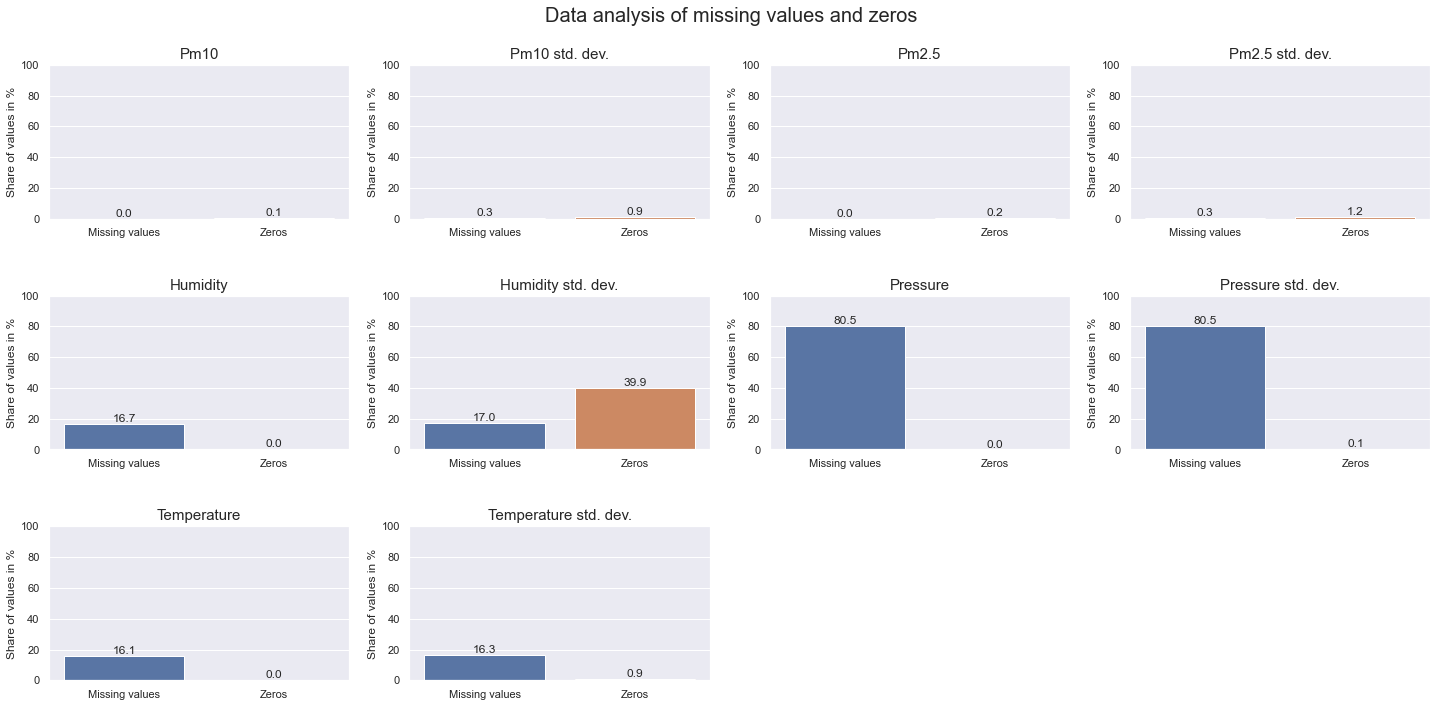

In [12]:
# define metrics and columns to plot
metrics = ["missing_values_share", "0_values_share"]
ys = sorted(list(df_data_analysis.columns))
ys.remove('metric')

# define size of subplot
columns = 4
rows = int(np.ceil((len(df_data_analysis.columns) - 1) / columns))

# plot
fig, ax = plt.subplots(rows, columns, figsize=(20,10)) # create subplots
plt.suptitle("Data analysis of missing values and zeros", fontsize=20) # title of plot
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

for row in range(rows):
    for col in range(columns):
        if col + row * (rows + 1) < len(ys):
            # create a bar for each metric defined above for a column of ys list
            sns.barplot(data=df_data_analysis[df_data_analysis['metric'].isin(metrics)], x='metric', y=ys[col + row * (rows + 1)], ax=ax[row][col])
            # set ylim to [0, 100] as we are plotting percentages
            ax[row][col].set_ylim([0, 100])
            # put the percentage above each plotted bar
            ax[row][col].bar_label(ax[row][col].containers[0], fmt='%.1f')
            # set the x, y and x-tick labels
            ax[row][col].set_xlabel("")
            ax[row][col].set_ylabel("Share of values in %")
            ax[row][col].set_xticklabels(labels=["Missing values", "Zeros"])
            # use the column name with slight changes as subplot name
            title = f"{ys[col + row * (rows + 1)]}".replace('_', ' ').replace('std', 'std. dev.').replace('2p5', '2.5').capitalize()
            ax[row][col].set_title(title, fontsize = 15);
        else:
            # delete not needed subplots
            fig.delaxes(ax[row][col])


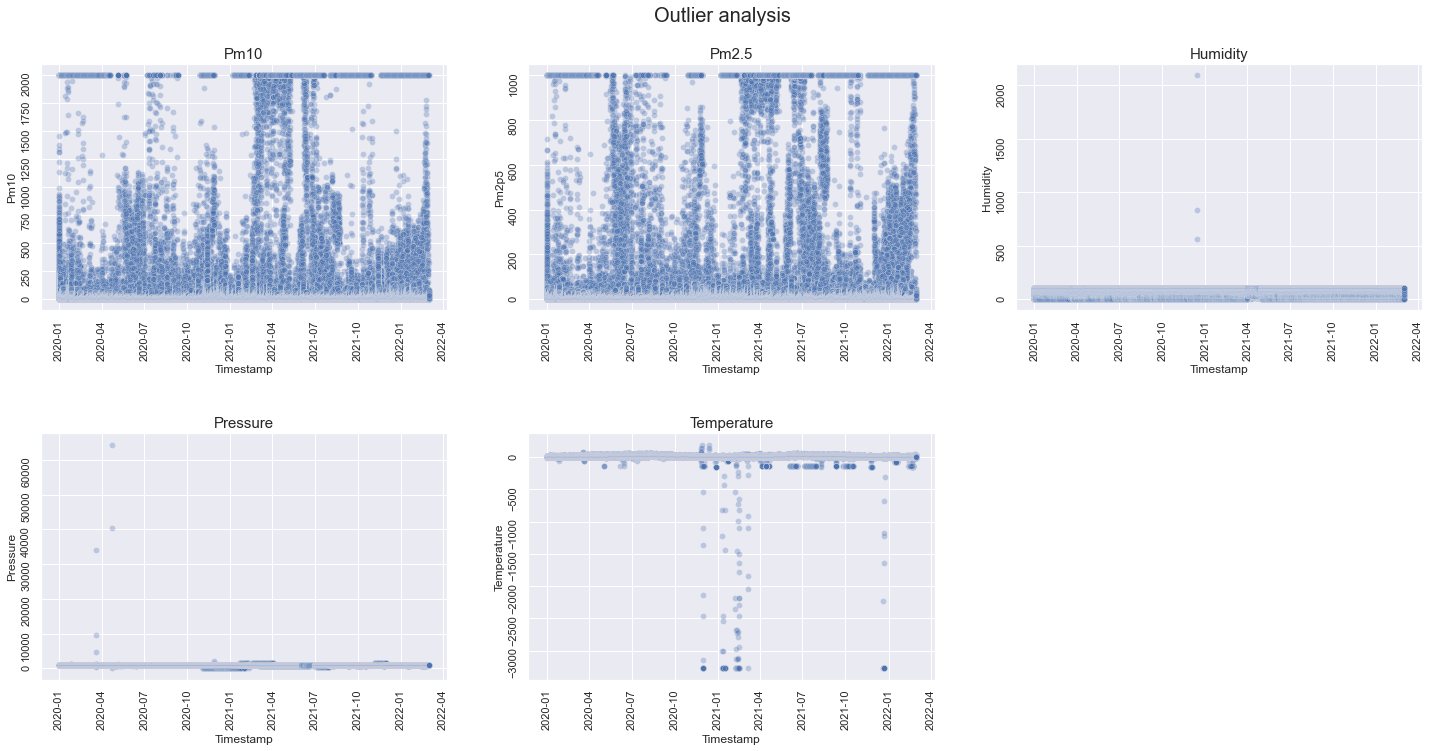

In [13]:
# columns to plot
ys = data_cols_wo_std

# define size of subplot
columns = 3
rows = int(np.ceil((len(ys)) / columns))

# plot
fig, ax = plt.subplots(rows, columns, figsize=(20,10)) # create subplots
plt.suptitle("Outlier analysis", fontsize=20) # title of plot
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

for row in range(rows):
    for col in range(columns):
        if col + row * (rows + 1) < len(ys):
            # create a bar for each metric defined above for a column of ys list
            sns.scatterplot(data=df_sc, x='timestamp', y=ys[col + row * (rows + 1)], ax=ax[row][col], alpha=.3)
            # set the x, y and x-tick labels
            ax[row][col].set_xlabel(ax[row][col].get_xlabel().capitalize())
            ax[row][col].set_ylabel(ax[row][col].get_ylabel().capitalize())
            # use the column name with slight changes as subplot name
            title = f"{ys[col + row * (rows + 1)]}".replace('_', ' ').replace('std', 'std. dev.').replace('2p5', '2.5').capitalize()
            ax[row][col].set_title(title, fontsize = 15)
            ax[row][col].tick_params(labelrotation=90)
        else:
            # delete not needed subplots
            fig.delaxes(ax[row][col])


There are few outliers in humidity, pressure and temperature which can be dropped by setting thresholds. </br>
For PM10 and PM2.5 it is less obvious as the data is scattered all over the possible range. 

# Delete unrealistic values and outliers for environmental variables

## hard thresholds based on physical estimations
We can first have a look at the extreme values measured by Deutscher Wetterdienst to get an impression what range of values is realistic.

In [14]:
print(df_dwd['humidity'].max())
print(df_dwd.query("City == 'Frankfurt'")['humidity'].min())
print(df_dwd.query("City == 'Bremen'")['humidity'].min())

100.0
15.0
22.0


In [15]:
print(df_dwd['pressure'].max())
print(df_dwd.query("City == 'Frankfurt'")['pressure'].min())
print(df_dwd.query("City == 'Bremen'")['pressure'].min())

1046.4
967.0
977.1


In [16]:
print(df_dwd['temperature'].max())
print(df_dwd.query("City == 'Frankfurt'")['temperature'].min())
print(df_dwd.query("City == 'Bremen'")['temperature'].min())

37.1
-10.5
-15.4


In [17]:
# thresholds_part = {
#     'PM10': (0, 1000),
#     'PM2p5': (0, 500),
# }
# set lower and upper threshold
thresholds_env = {
    'humidity': (15, 100),
    'pressure': (960, 1050),
    'temperature': (-20, 60),
}

# delete values below lower and above upper threshold
for col, thresh in thresholds_env.items():
    nan_before = df_sc[col].isna().sum()
    df_sc.iloc[df_sc[col] <= thresh[0], list(df_sc.columns).index(col)] = np.nan
    df_sc.iloc[df_sc[col] >= thresh[1], list(df_sc.columns).index(col)] = np.nan
    print(f"added {df_sc[col].isna().sum() - nan_before} nans in {col}")


added 117193 nans in humidity
added 9638 nans in pressure
added 2133 nans in temperature


## values with std. dev. 'nan' or zero
If the standard deviation is 'nan', there was no or only one observation. If the standard deviation is zero, there was no fluctuation in the measured value, what can be assumed to be a measurement error.

In [18]:
# delete values for the defined columns if the standard deviation is zero or 'nan'
for col in [
    'temperature',
    'humidity',
    'pressure',
]:
    df_sc.loc[df_sc[col+'_std']==0, col] = np.nan    
    df_sc.loc[df_sc[col+'_std']==np.nan, col] = np.nan    


## dynamic thresholds based on quantiles

In [77]:
# define quantiles as threshold
thresh = {
    'temperature': (.01, .85),
    'humidity': (.05, .95),
    'pressure': (.05, .95),
}

# make a dataframe containing median, upper and lower threshold defined by the quantiles above
df_thresholds = df_sc.groupby(['city', 'timestamp']).agg(
    temp_median = pd.NamedAgg(column='temperature', aggfunc='median'), 
    temp_lower = pd.NamedAgg(column='temperature', aggfunc=lambda x: x.quantile(q=thresh['temperature'][0])),
    temp_upper = pd.NamedAgg(column='temperature', aggfunc=lambda x: x.quantile(q=thresh['temperature'][1])),
    hum_median = pd.NamedAgg(column='humidity', aggfunc='median'), 
    hum_lower = pd.NamedAgg(column='humidity', aggfunc=lambda x: x.quantile(q=thresh['humidity'][0])),
    hum_upper = pd.NamedAgg(column='humidity', aggfunc=lambda x: x.quantile(q=thresh['humidity'][1])),
    pres_median = pd.NamedAgg(column='pressure', aggfunc='median'), 
    pres_lower = pd.NamedAgg(column='pressure', aggfunc=lambda x: x.quantile(q=thresh['pressure'][0])),
    pres_upper = pd.NamedAgg(column='pressure', aggfunc=lambda x: x.quantile(q=thresh['pressure'][1])),
).reset_index()

# merge the thresholds with the sc dataframe
df_sc = df_sc.merge(df_thresholds, how='left', on=['city', 'timestamp'])

In [52]:
df_sc.head()

location_id  timestamp  hour       date        lat       lon       city  \
0            2 2020-01-01     0 2020-01-01  50.042000  8.436000  Frankfurt   
1            3 2020-01-01     0 2020-01-01  50.046000  8.852000  Frankfurt   
2            6 2020-01-01     0 2020-01-01  50.055659  8.692377  Frankfurt   
3            7 2020-01-01     0 2020-01-01  50.056000  8.506000  Frankfurt   
4           10 2020-01-01     0 2020-01-01  50.058000  8.688000  Frankfurt   

         PM10    PM10_std       PM2p5  ...  temp_lower  temp_upper  \
0  212.110833   24.278724  140.574167  ...   -1.468305      2.9158   
1  627.256000   62.521844  311.089200  ...   -1.468305      2.9158   
2  305.763333  114.922437  203.632500  ...   -1.468305      2.9158   
3  177.833333   32.063441   86.575000  ...   -1.468305      2.9158   
4   96.024167   60.892413   51.565833  ...   -1.468305      2.9158   

   hum_median  hum_lower  hum_upper  pres_median   pres_lower   pres_upper  \
0   85.721833  48.624479    98.7322  1023.461954  1019.392104  1031.868062   
1   85.721833  48.624479    98.7322  1023.461954  1019.392104  1031.868062   
2   85.721833  48.624479    98.7322  1023.461954  1019.392104  1031.868062   
3   85.721833  48.624479    98.7322  1023.461954  1019.392104  1031.868062   
4   85.721833  48.624479    98.7322  1023.461954  1019.392104  1031.868062   

      PM2p5_quality      PM10_quality  
0  6-extremely poor  6-extremely poor  
1  6-extremely poor  6-extremely poor  
2  6-extremely poor  6-extremely poor  
3  6-extremely poor  6-extremely poor  
4       5-very poor            4-poor  

[5 rows x 28 columns]

In [60]:
# make a dataframe containing median per location_id
df_medians = df_sc.groupby(['city', 'location_id']).agg(
    temp_median = pd.NamedAgg(column='temperature', aggfunc='median'), 
    temp_count = pd.NamedAgg(column='temperature', aggfunc='count'), 
    hum_median = pd.NamedAgg(column='humidity', aggfunc='median'), 
    hum_count = pd.NamedAgg(column='humidity', aggfunc='count'), 
    pres_median = pd.NamedAgg(column='pressure', aggfunc='median'), 
    pres_count = pd.NamedAgg(column='pressure', aggfunc='count'),
    ).reset_index()

In [61]:
df_medians.sort_values('hum_median')

city  location_id  temp_median  temp_count  hum_median  hum_count  \
179  Frankfurt          122    22.204257         166   37.235739        866   
55      Bremen          180    27.089474        1216   38.855000       6313   
46      Bremen          171    18.475000          29   39.317391       1289   
2       Bremen          127     5.900000          47   41.850000        194   
37      Bremen          162    24.555250          48   46.484250        194   
..         ...          ...          ...         ...         ...        ...   
164  Frankfurt          107          NaN           0         NaN          0   
167  Frankfurt          110          NaN           0         NaN          0   
168  Frankfurt          111          NaN           0         NaN          0   
169  Frankfurt          112          NaN           0         NaN          0   
170  Frankfurt          113          NaN           0         NaN          0   

     pres_median  pres_count  
179          NaN           0  
55           NaN           0  
46           NaN           0  
2            NaN           0  
37           NaN           0  
..           ...         ...  
164          NaN           0  
167          NaN           0  
168          NaN           0  
169          NaN           0  
170          NaN           0  

[182 rows x 8 columns]

<AxesSubplot:xlabel='timestamp', ylabel='humidity'>

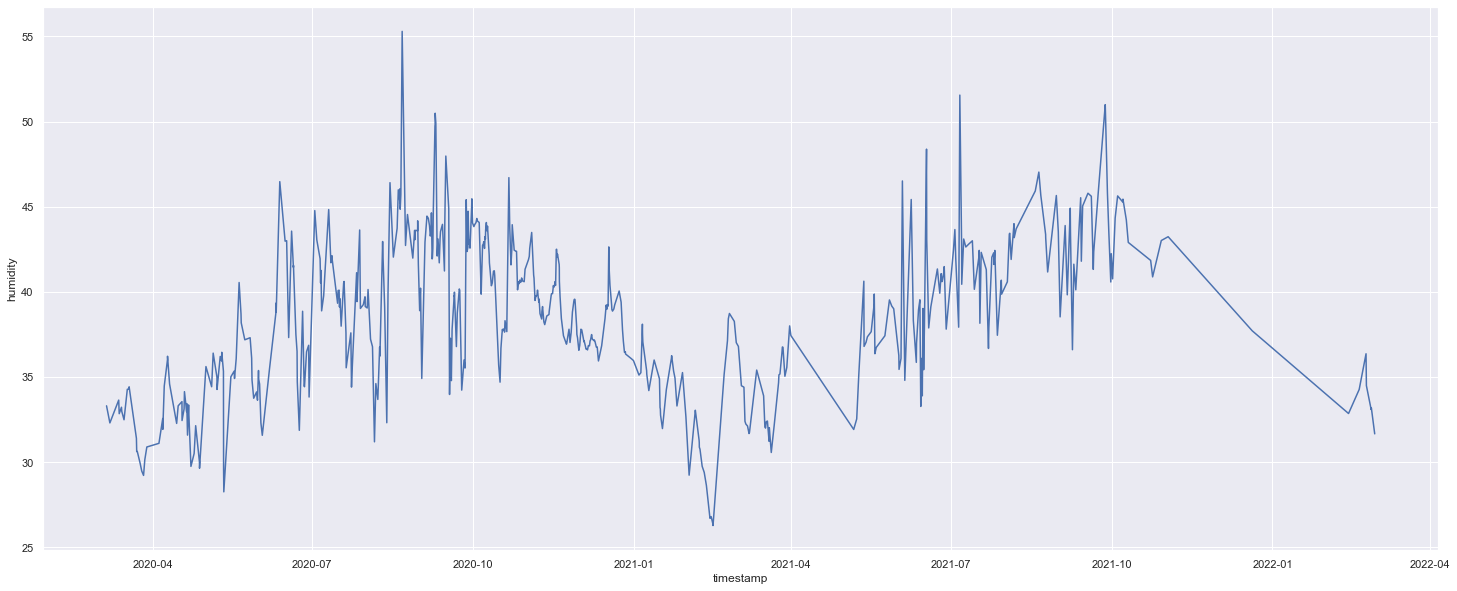

In [67]:
plt.figure(figsize=(25, 10))
sns.lineplot(data=df_sc.query("city=='Bremen' and  location_id==180")[::10], x='timestamp', y='humidity')

In [76]:
# sensor measuring uncommon small humidity values
df_sc.query("city=='Bremen' and  location_id==180")
df_sc.query("lat==53.132 and lon==8.708")
# closest sensors
df_sc.query("53.09<lat<53.17 and 8.67<lon<8.75").groupby(['location_id', 'lat', 'lon', 'city']).median()


hour       PM10  PM10_std     PM2p5  \
location_id lat       lon      city                                          
166         53.092000 8.746000 Bremen  12.0  14.218235  2.720407  5.360652   
179         53.131823 8.732302 Bremen  12.0  10.153200  1.864921  4.809600   
180         53.132000 8.708000 Bremen  12.0   1.568000  0.442126  0.930000   
181         53.132000 8.732000 Bremen  11.0   4.852433  1.278896  2.001268   

                                       PM2p5_std   humidity  humidity_std  \
location_id lat       lon      city                                         
166         53.092000 8.746000 Bremen   0.642157        NaN           NaN   
179         53.131823 8.732302 Bremen   0.620536  82.303333      0.000000   
180         53.132000 8.708000 Bremen   0.154712  38.855000      0.107606   
181         53.132000 8.732000 Bremen   0.322333  61.639205      0.000000   

                                          pressure  pressure_std  temperature  \
location_id lat       lon      city                                             
166         53.092000 8.746000 Bremen  1011.578977      0.173564     6.802195   
179         53.131823 8.732302 Bremen  1015.940375      0.105618     9.532500   
180         53.132000 8.708000 Bremen          NaN           NaN    27.089474   
181         53.132000 8.732000 Bremen  1014.154261      0.089761    17.811761   

                                       temperature_std  temp_median  \
location_id lat       lon      city                                   
166         53.092000 8.746000 Bremen         0.201439    10.822233   
179         53.131823 8.732302 Bremen         0.126458     9.633333   
180         53.132000 8.708000 Bremen         0.053530    10.941667   
181         53.132000 8.732000 Bremen         0.289743    19.215500   

                                       temp_lower  temp_upper  hum_median  \
location_id lat       lon      city                                         
166         53.092000 8.746000 Bremen    8.732862   13.336904   75.366568   
179         53.131823 8.732302 Bremen    7.997480   11.989500   76.727500   
180         53.132000 8.708000 Bremen    9.007997   13.426750   76.947917   
181         53.132000 8.732000 Bremen   16.901310   21.578675   73.810619   

                                       hum_lower  hum_upper  pres_median  \
location_id lat       lon      city                                        
166         53.092000 8.746000 Bremen  39.508187  97.803231  1016.583967   
179         53.131823 8.732302 Bremen  41.048500  97.924875  1015.611509   
180         53.132000 8.708000 Bremen  39.784109  97.948068  1015.885786   
181         53.132000 8.732000 Bremen  41.333290  98.093848  1015.359396   

                                        pres_lower   pres_upper  
location_id lat       lon      city                              
166         53.092000 8.746000 Bremen  1014.720661  1017.385435  
179         53.131823 8.732302 Bremen  1014.135899  1016.538446  
180         53.132000 8.708000 Bremen  1014.389200  1017.213899  
181         53.132000 8.732000 Bremen  1014.335704  1015.869645

In [20]:
df_thresholds.describe()

temp_median    temp_lower    temp_upper    hum_median     hum_lower  \
count  37574.000000  37574.000000  37574.000000  37574.000000  37574.000000   
mean      12.294736      9.711705     14.759542     73.372111     42.859630   
std        7.475532      7.239548      7.977950     12.454773     10.046168   
min       -9.306818    -14.516312     -7.397420     19.299130     15.389356   
25%        6.404511      4.120091      8.343800     66.598484     36.093360   
50%       11.251664      8.852222     13.470574     75.168644     42.657161   
75%       17.718973     15.135877     20.216302     82.590241     49.686177   
max       38.229167     31.953625     42.792000     99.900000     99.900000   

          hum_upper   pres_median    pres_lower    pres_upper  
count  37574.000000  36902.000000  36902.000000  36902.000000  
mean      95.158946   1009.565499   1005.670787   1013.562127  
std        7.444226     11.414063     12.992028     10.642600  
min       28.900000    966.462501    963.596699    972.203628  
25%       94.749029   1001.923691    996.873440   1006.926738  
50%       97.407650   1009.441996   1005.316644   1013.691471  
75%       98.969274   1017.832768   1015.509362   1020.598655  
max       99.988737   1046.455850   1045.561740   1047.825628

In [21]:
# replace values below lower threshold and above upper threshold with 'nan'
for col, thresholds in {
    'temperature': ['temp_lower', 'temp_upper'],
    'humidity': ['hum_lower', 'hum_upper'],
    'pressure': ['pres_lower','pres_upper'],
}.items():
    nan_before = df_sc[col].isna().sum()
    df_sc.loc[(df_sc[col] < df_sc[thresholds[0]]) | (df_sc[col] > df_sc[thresholds[1]]), col] = np.nan
    print(f"{df_sc[col].isna().sum() - nan_before} nans added in {col}")


282580 nans added in temperature
112751 nans added in humidity
72212 nans added in pressure


# Visualization of cleaned data and comparison with dwd data

''

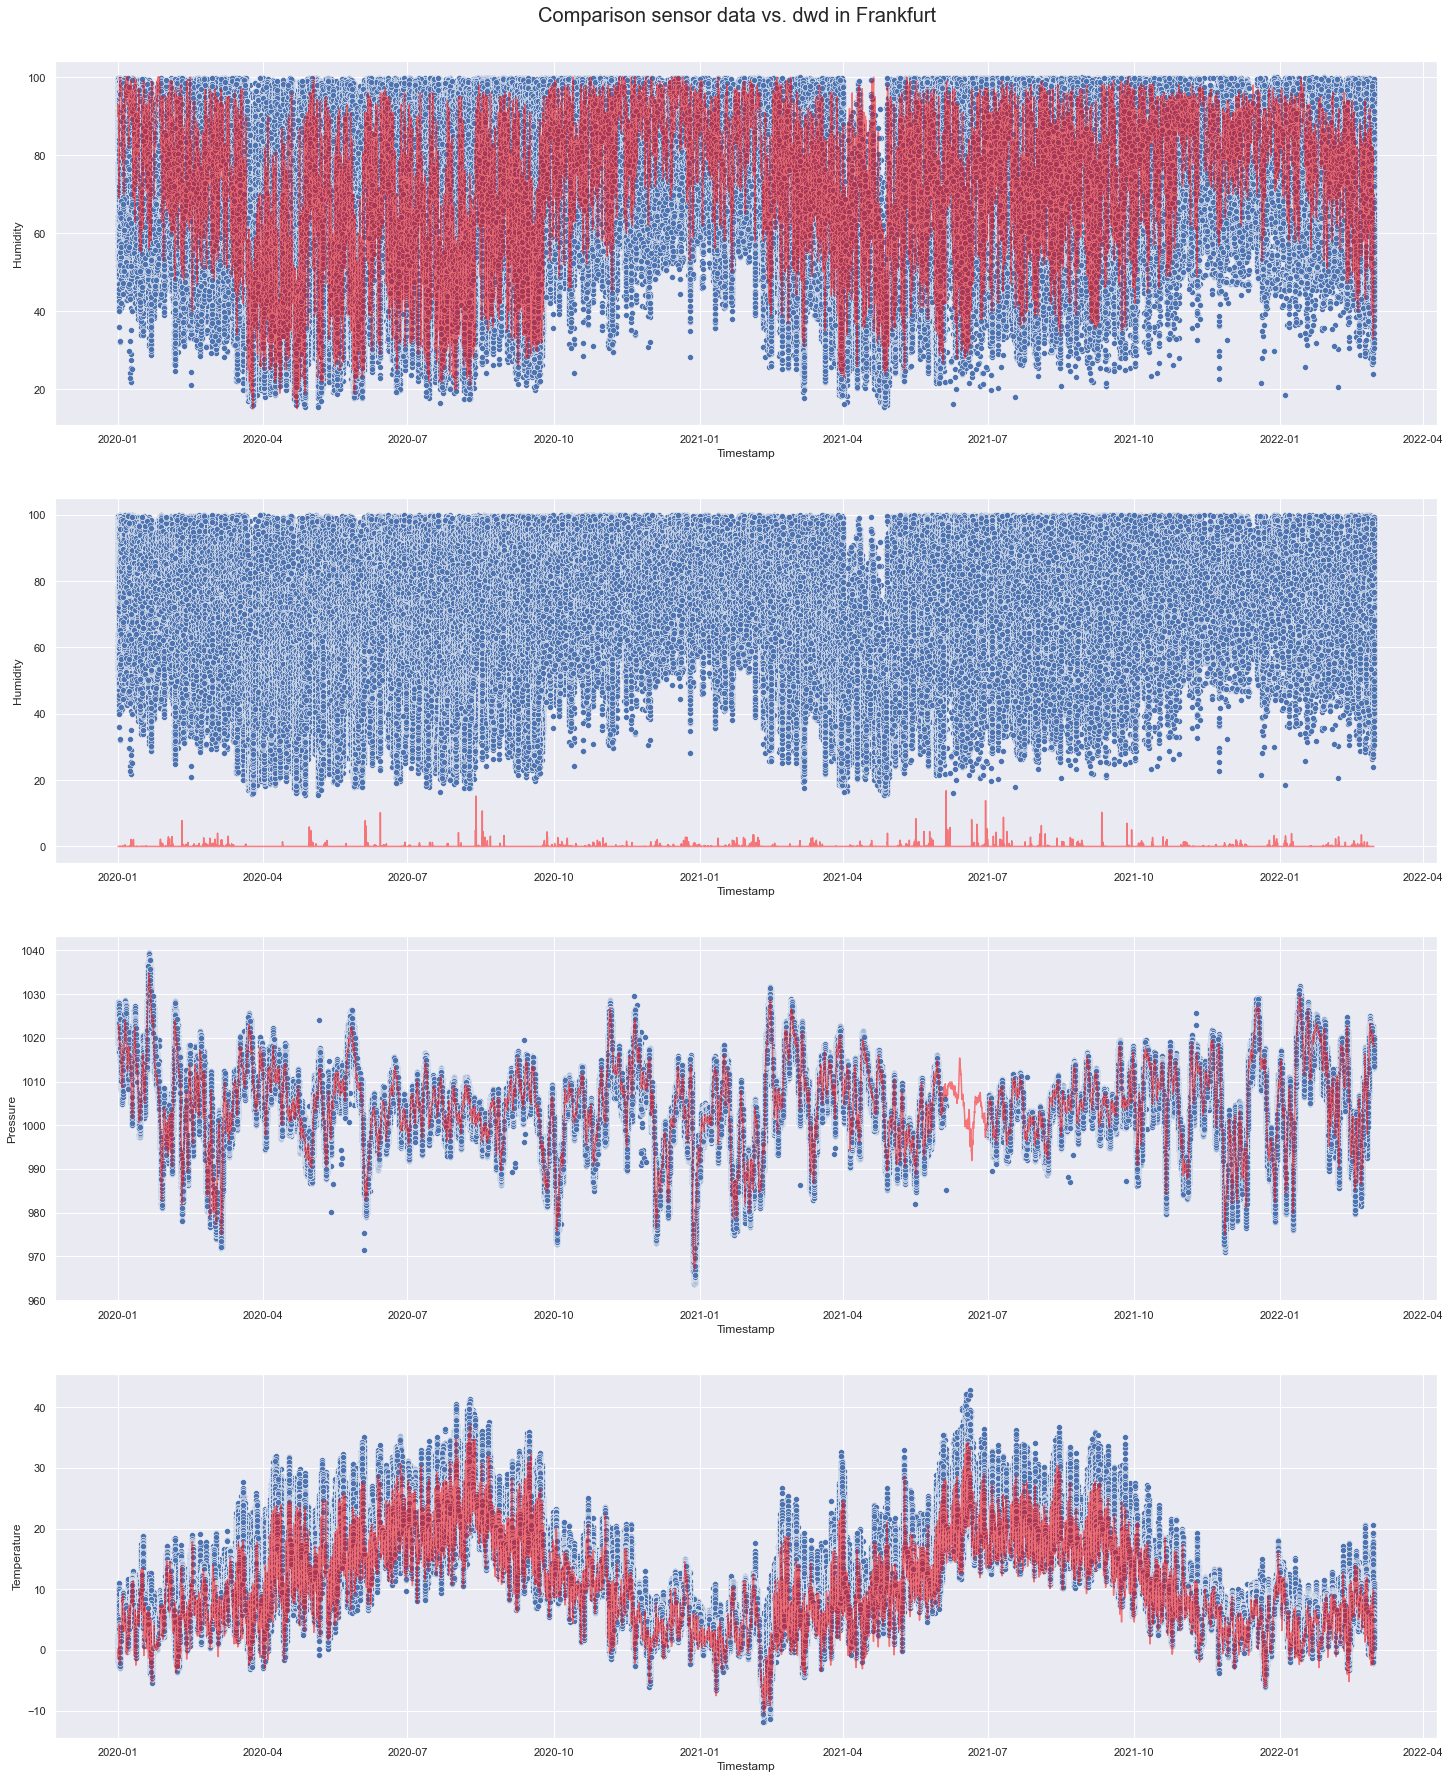

In [22]:
# Plot dwd and sc data for Frankfurt
# define columns to plot
ys = data_cols_wo_std

# define size of subplot
columns = 1
rows = int(np.ceil((len(ys)) / columns)) -1

# plot
fig, ax = plt.subplots(rows, columns, figsize=(20,25)) # create subplots
plt.suptitle("Comparison sensor data vs. dwd in Frankfurt", fontsize=20) # title of plot
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .2, wspace = .2, top = .95) # adjusts the space between the single subplots

# Plot humidity from both datasets vs time
sns.scatterplot(data=df_sc[df_sc['city'] == 'Frankfurt'], x='timestamp', y='humidity', ax=ax[0])
sns.lineplot(data=df_dwd[df_dwd['City']=='Frankfurt'], x='date', y='humidity', color='red', alpha=.5, ax=ax[0])
ax[0].set_xlabel(ax[0].get_xlabel().capitalize())
ax[0].set_ylabel(ax[0].get_ylabel().capitalize())

# Plot humidity and precipitation from both datasets vs time
sns.scatterplot(data=df_sc[df_sc['city'] == 'Frankfurt'], x='timestamp', y='humidity', ax=ax[1])
sns.lineplot(data=df_dwd[df_dwd['City']=='Frankfurt'], x='date', y='precip', color='red', alpha=.5, ax=ax[1])
ax[1].set_xlabel(ax[1].get_xlabel().capitalize())
ax[1].set_ylabel(ax[1].get_ylabel().capitalize())

# Plot pressure from both datasets vs time
sns.scatterplot(data=df_sc[df_sc['city'] == 'Frankfurt'], x='timestamp', y='pressure', ax=ax[2])
sns.lineplot(data=df_dwd[df_dwd['City']=='Frankfurt'], x='date', y='pressure', color='red', alpha=.5, ax=ax[2])
ax[2].set_xlabel(ax[2].get_xlabel().capitalize())
ax[2].set_ylabel(ax[2].get_ylabel().capitalize())

# Plot temperature from both datasets vs time
sns.scatterplot(data=df_sc[df_sc['city'] == 'Frankfurt'], x='timestamp', y='temperature', ax=ax[3])
sns.lineplot(data=df_dwd[df_dwd['City']=='Frankfurt'], x='date', y='temperature', color='red', alpha=.5, ax=ax[3])
ax[3].set_xlabel(ax[3].get_xlabel().capitalize())
ax[3].set_ylabel(ax[3].get_ylabel().capitalize())

;

''

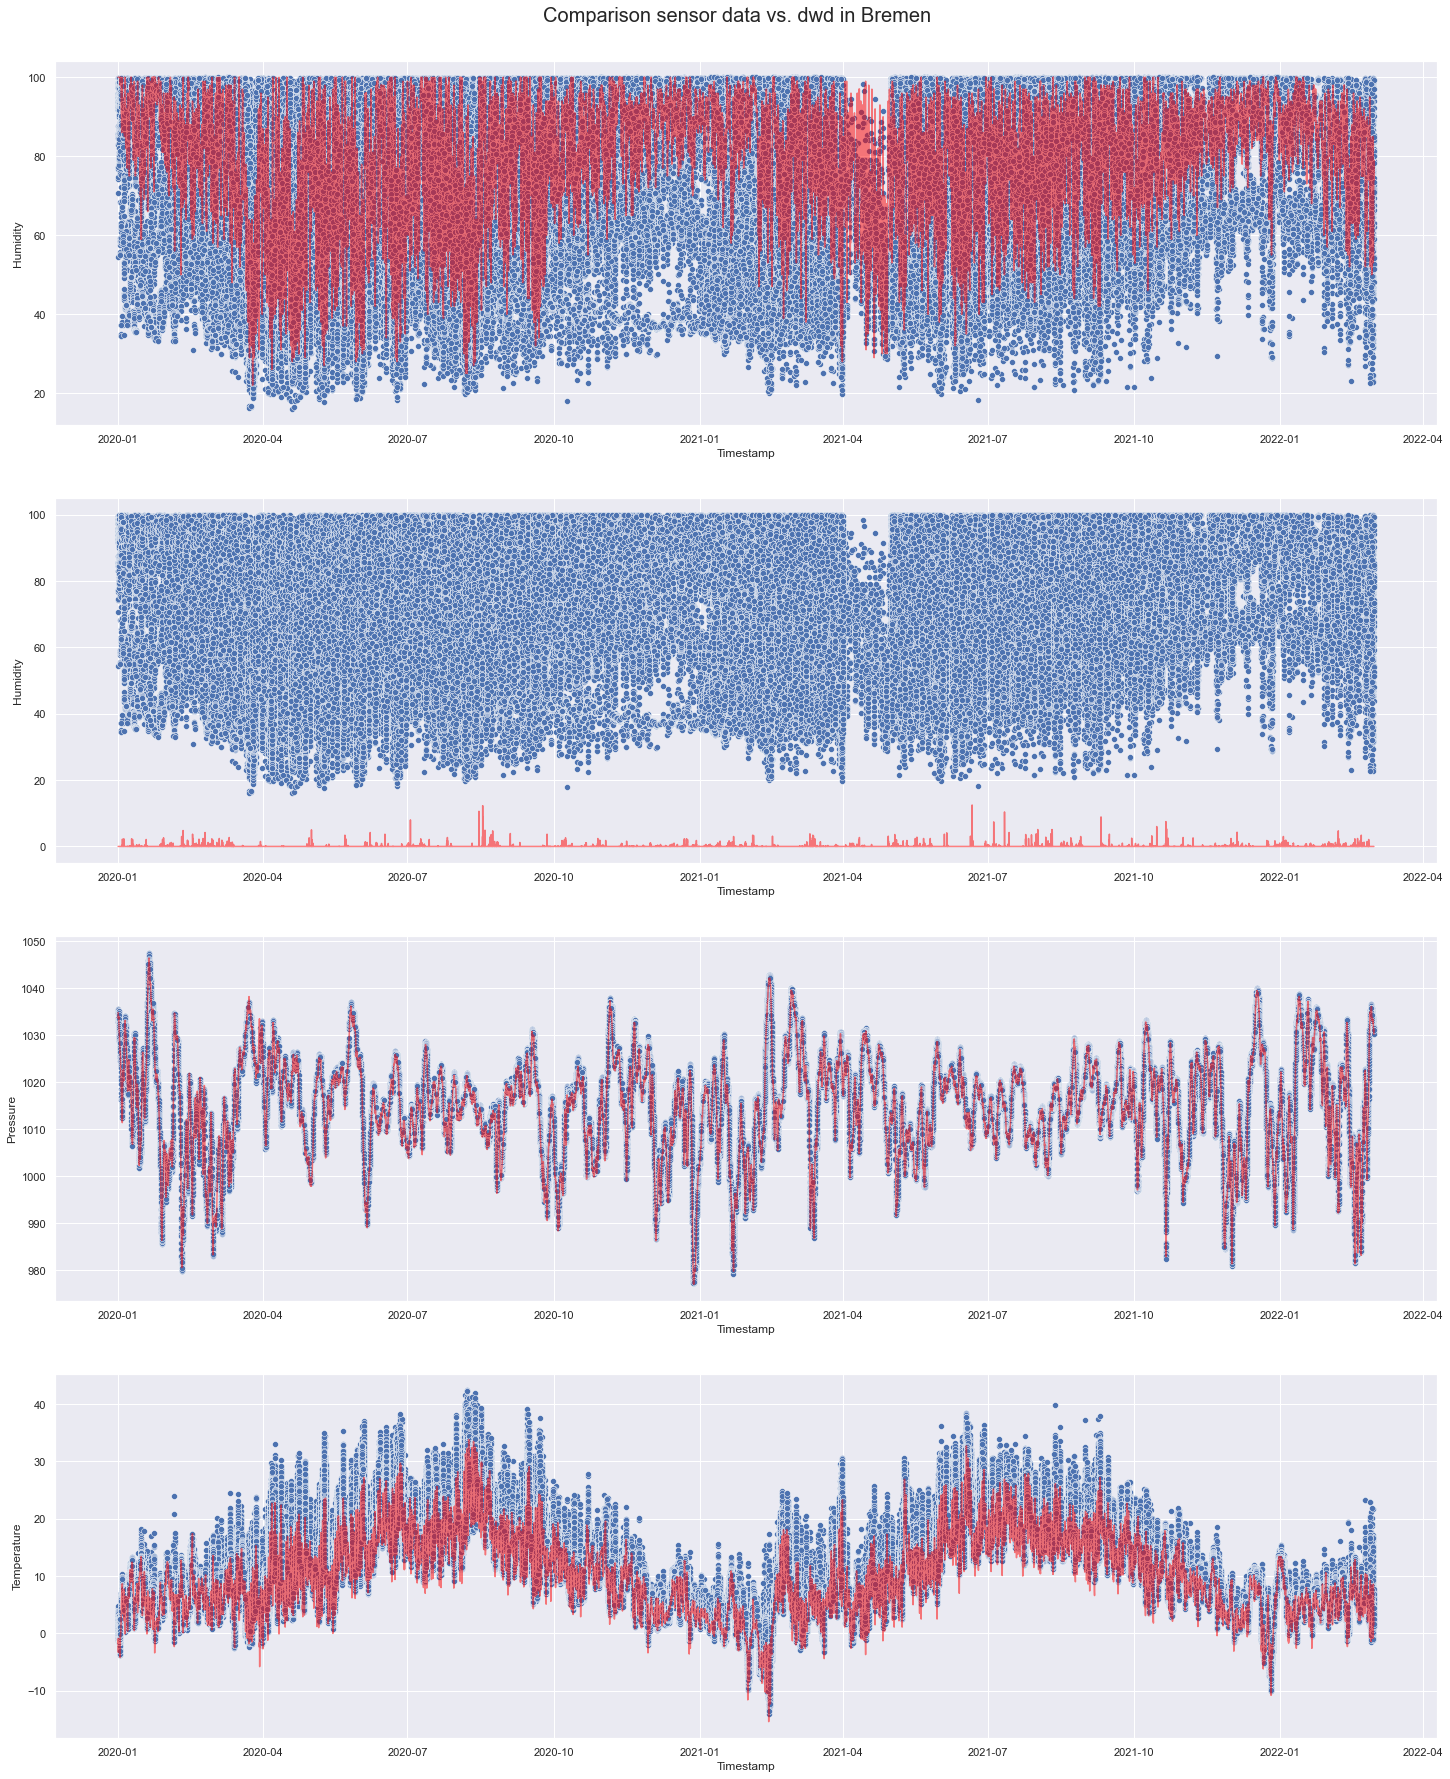

In [23]:
# Plot dwd and sc data for Bremen
# define columns to plot
ys = data_cols_wo_std

# define size of subplot
columns = 1
rows = int(np.ceil((len(ys)) / columns)) -1

# plot
fig, ax = plt.subplots(rows, columns, figsize=(20,25)) # create subplots
plt.suptitle("Comparison sensor data vs. dwd in Bremen", fontsize=20) # title of plot
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .2, wspace = .2, top = .95) # adjusts the space between the single subplots

# Plot humidity from both datasets vs time
sns.scatterplot(data=df_sc[df_sc['city'] == 'Bremen'], x='timestamp', y='humidity', ax=ax[0])
sns.lineplot(data=df_dwd[df_dwd['City']=='Bremen'], x='date', y='humidity', color='red', alpha=.5, ax=ax[0])
ax[0].set_xlabel(ax[0].get_xlabel().capitalize())
ax[0].set_ylabel(ax[0].get_ylabel().capitalize())

# Plot humidity and precipitation 
sns.scatterplot(data=df_sc[df_sc['city'] == 'Bremen'], x='timestamp', y='humidity', ax=ax[1])
sns.lineplot(data=df_dwd[df_dwd['City']=='Bremen'], x='date', y='precip', color='red', alpha=.5, ax=ax[1])
ax[1].set_xlabel(ax[1].get_xlabel().capitalize())
ax[1].set_ylabel(ax[1].get_ylabel().capitalize())

# Plot pressure from both datasets vs time
sns.scatterplot(data=df_sc[df_sc['city'] == 'Bremen'], x='timestamp', y='pressure', ax=ax[2])
sns.lineplot(data=df_dwd[df_dwd['City']=='Bremen'], x='date', y='pressure', color='red', alpha=.5, ax=ax[2])
ax[2].set_xlabel(ax[2].get_xlabel().capitalize())
ax[2].set_ylabel(ax[2].get_ylabel().capitalize())

# Plot temperature from both datasets vs time
sns.scatterplot(data=df_sc[df_sc['city'] == 'Bremen'], x='timestamp', y='temperature', ax=ax[3])
sns.lineplot(data=df_dwd[df_dwd['City']=='Bremen'], x='date', y='temperature', color='red', alpha=.5, ax=ax[3])
ax[3].set_xlabel(ax[3].get_xlabel().capitalize())
ax[3].set_ylabel(ax[3].get_ylabel().capitalize())

;

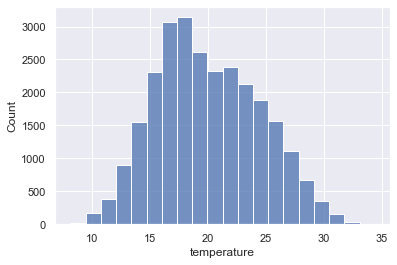

In [24]:
# Example of the distribution of measured temperatures in one day
sns.histplot(data=df_sc[(df_sc['timestamp']>'2020-07-01') & (df_sc['timestamp']<'2020-07-15')], x='temperature', bins=20);

# Investigation of single locations

In [25]:
# group by location_id and calculate the total number of hours with measurements, date of the first and of the last measurement
location_grouped = df_sc[['location_id', 'hour', 'date']].\
    groupby(['location_id']).\
        agg(
                hours = pd.NamedAgg(column='hour', aggfunc='count'), 
                date_min = pd.NamedAgg(column='date', aggfunc='min'),
                date_max = pd.NamedAgg(column='date', aggfunc='max')
            ).\
            reset_index().\
                sort_values('hours', ascending=False)

location_grouped['date_min'] = pd.to_datetime(location_grouped['date_min'])
location_grouped['date_max'] = pd.to_datetime(location_grouped['date_max'])
location_grouped['period_length'] = location_grouped['date_max'] - location_grouped['date_min'] + pd.Timedelta(days=1)
location_grouped['hours_per_day'] = location_grouped['hours'] / location_grouped['period_length'].dt.days
location_grouped.sample(5)

location_id  hours   date_min   date_max period_length  hours_per_day
45            46   3999 2020-01-01 2020-06-20      172 days      23.250000
107          108  11962 2020-02-25 2021-08-16      539 days      22.192950
161          162    229 2020-07-15 2020-07-29       15 days      15.266667
163          164   2492 2021-11-17 2022-02-28      104 days      23.961538
150          151   5524 2020-01-01 2021-02-28      425 days      12.997647

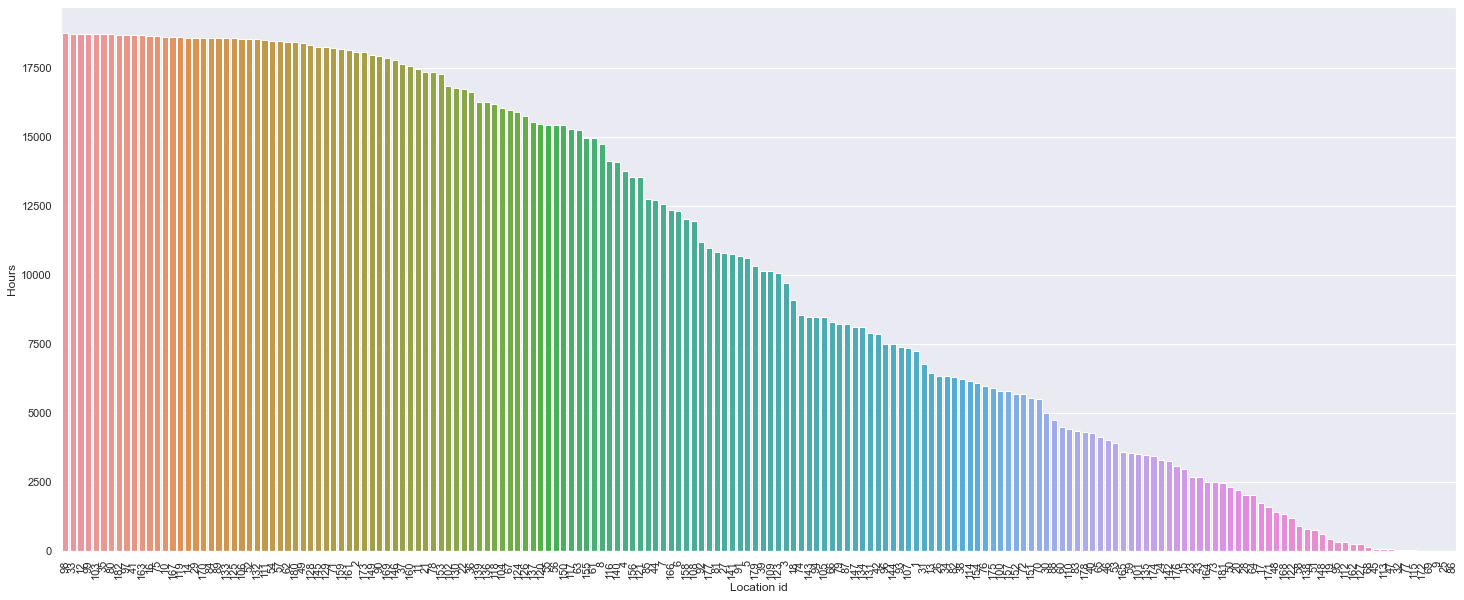

In [26]:
# plot the number of hours that were measured at each location
plt.figure(figsize=(25, 10))
g = sns.barplot(data=location_grouped, x='location_id', y='hours', order=location_grouped.sort_values('hours', ascending=False)['location_id'])
g.set_xlabel(g.get_xlabel().capitalize().replace('_', ' '))
g.set_ylabel(g.get_ylabel().capitalize())
plt.xticks(rotation=90);

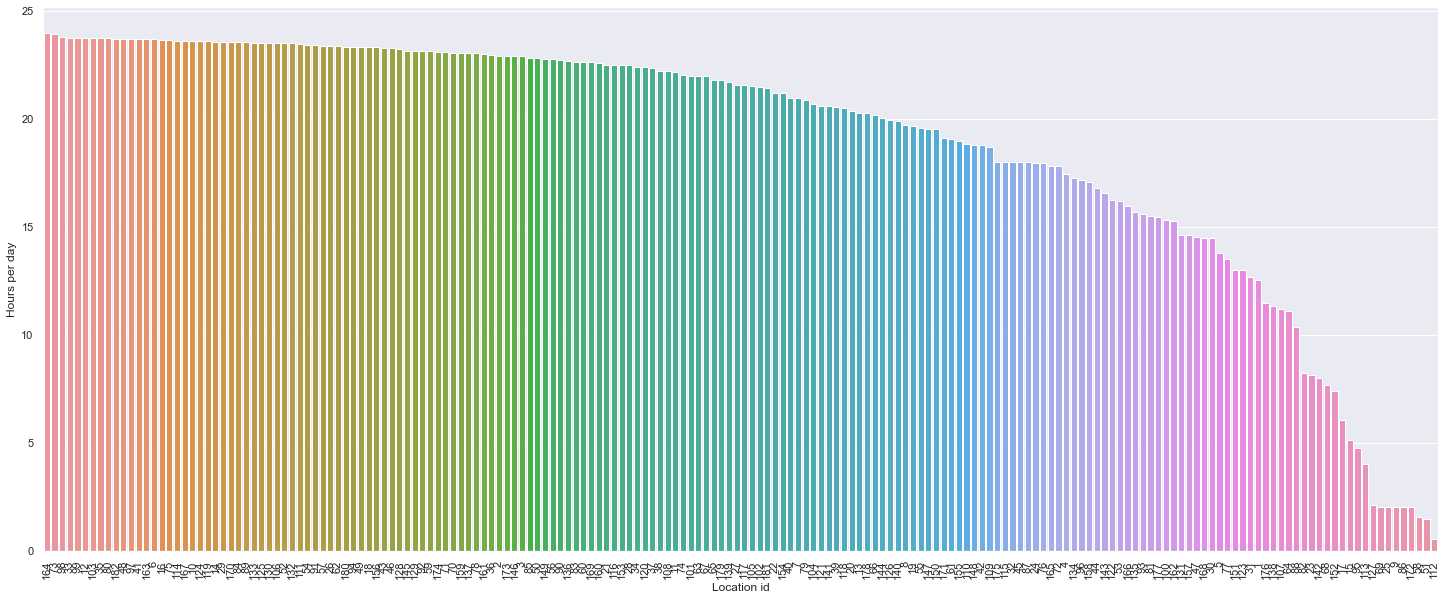

In [27]:
# plot the number of hours per day measured per location
plt.figure(figsize=(25, 10))
g = sns.barplot(data=location_grouped.sort_values('hours_per_day', ascending=False), x='location_id', y='hours_per_day', order=location_grouped.sort_values('hours_per_day', ascending=False)['location_id'])
g.set_xlabel(g.get_xlabel().capitalize().replace('_', ' '))
g.set_ylabel(g.get_ylabel().capitalize().replace('_', ' '))
plt.xticks(rotation=90);

In [28]:
print(f"Total number of locations: {location_grouped.shape[0]}")
print('Locations with the least hours of measurement:')
location_grouped.tail(20)

Total number of locations: 182
Locations with the least hours of measurement:


location_id  hours   date_min   date_max period_length  hours_per_day
137          138    803 2020-12-01 2021-02-09       71 days      11.309859
50            51    740 2020-04-04 2021-08-28      512 days       1.445312
147          148    620 2020-01-01 2020-02-02       33 days      18.787879
18            19    432 2021-12-17 2022-01-07       22 days      19.636364
94            95    314 2020-01-31 2020-04-05       66 days       4.757576
111          112    310 2020-06-13 2022-01-16      583 days       0.531732
161          162    229 2020-07-15 2020-07-29       15 days      15.266667
126          127    225 2020-01-01 2020-04-16      107 days       2.102804
67            68    130 2021-04-08 2021-04-24       17 days       7.647059
44            45     72 2021-09-29 2021-10-02        4 days      18.000000
112          113     64 2021-06-11 2021-06-26       16 days       4.000000
46            47     58 2021-07-07 2021-07-10        4 days      14.500000
31            32     36 2020-01-01 2020-01-02        2 days      18.000000
76            77     27 2020-01-05 2020-01-06        2 days      13.500000
114          115     18 2021-05-25 2021-05-25        1 days      18.000000
171          172      4 2020-02-01 2020-02-02        2 days       2.000000
68            69      2 2021-06-07 2021-06-07        1 days       2.000000
8              9      2 2021-06-07 2021-06-07        1 days       2.000000
24            25      2 2020-05-24 2020-05-24        1 days       2.000000
85            86      2 2021-03-03 2021-03-03        1 days       2.000000

In [29]:
location_grouped[['hours', 'hours_per_day']].describe().T.round(1)

count     mean     std  min     25%      50%      75%      max
hours          182.0  10288.0  6753.9  2.0  4033.2  10249.0  17547.0  18775.0
hours_per_day  182.0     19.0     6.0  0.5    17.1     21.6     23.2     24.0

There are some sensor locations which delivered data only for few hours

Text(0.5, 1.0, 'Bremen - PM2.5')

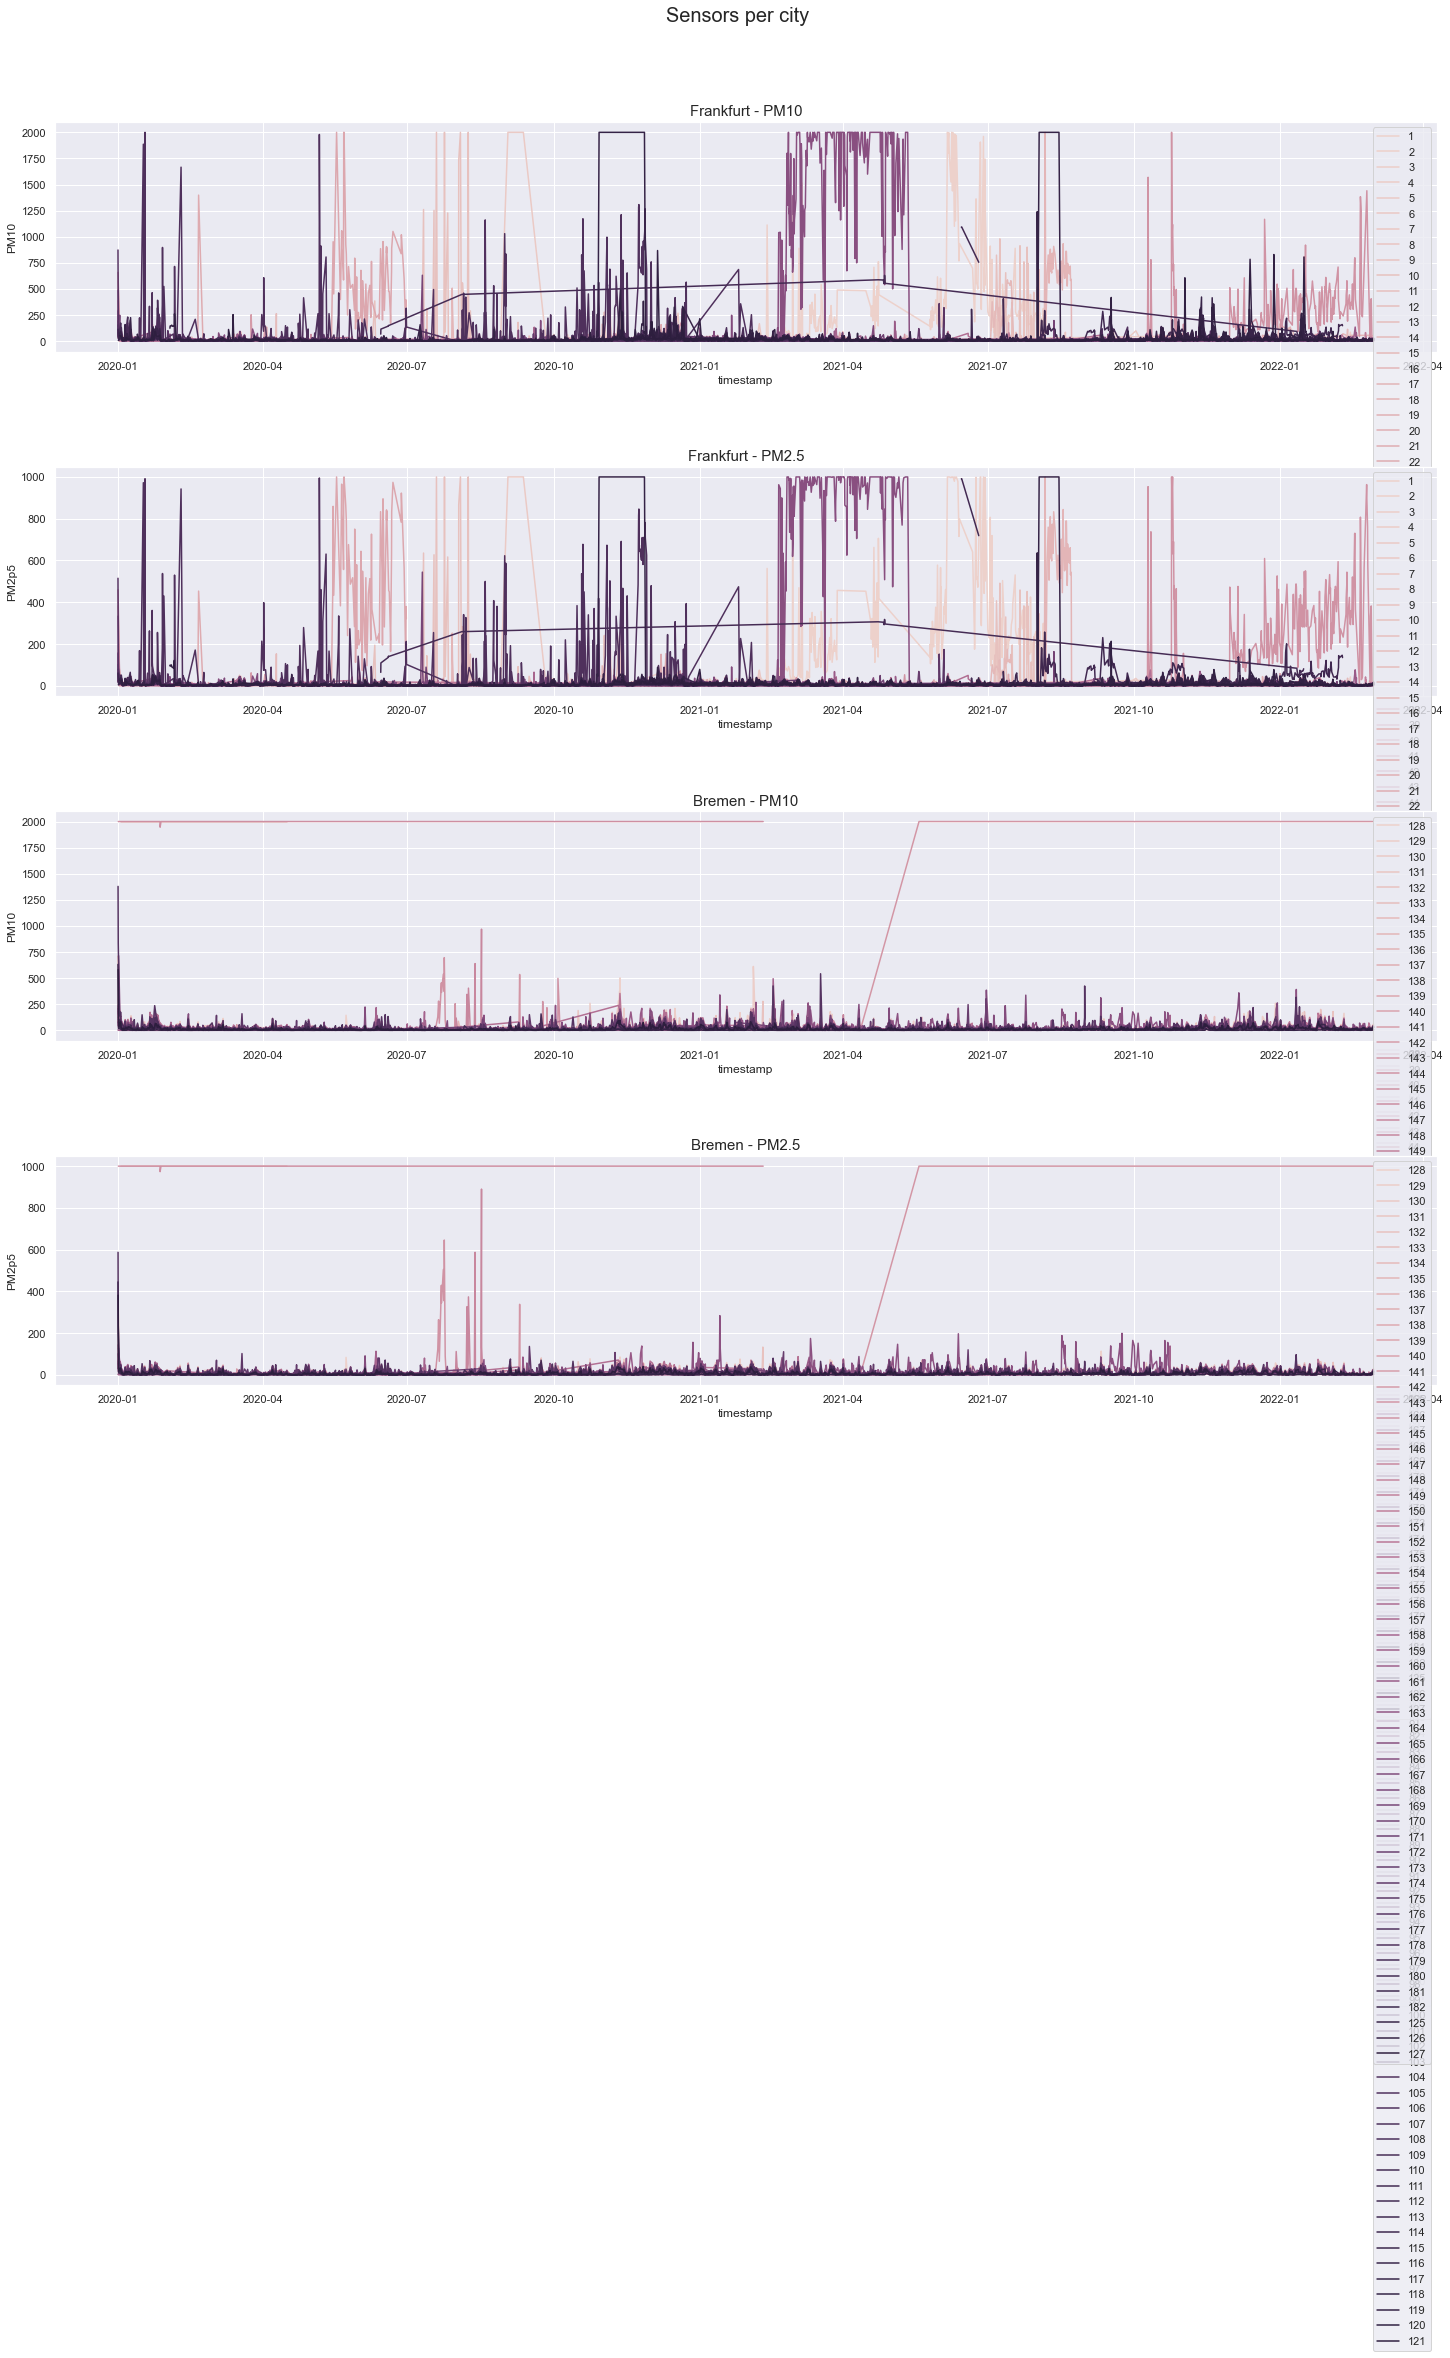

In [30]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 20))
plt.suptitle("Sensors per city", fontsize=20) # title of plot
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

labels_frankfurt = set(df_sc.query("city=='Frankfurt'")['location_id'])
labels_bremen = set(df_sc.query("city=='Bremen'")['location_id'])

sns.lineplot(data=df_sc[df_sc['city']=='Frankfurt'][::10], x='timestamp', y='PM10', hue='location_id', ax=ax1, legend=False)
ax1.legend(labels=labels_frankfurt)
ax1.set_title('Frankfurt - PM10', fontsize = 15)

sns.lineplot(data=df_sc[df_sc['city']=='Frankfurt'][::10], x='timestamp', y='PM2p5', hue='location_id', ax=ax2, legend=False)
ax2.legend(labels=labels_frankfurt)
ax2.set_title('Frankfurt - PM2.5', fontsize = 15)

sns.lineplot(data=df_sc[df_sc['city']=='Bremen'][::10], x='timestamp', y='PM10', hue='location_id', ax=ax3, legend=False)
ax3.legend(labels=labels_bremen)
ax3.set_title('Bremen - PM10', fontsize = 15)

sns.lineplot(data=df_sc[df_sc['city']=='Bremen'][::10], x='timestamp', y='PM2p5', hue='location_id', ax=ax4, legend=False)
ax4.legend(labels=labels_bremen)
ax4.set_title('Bremen - PM2.5', fontsize = 15)
#plt.legend([], [], frameon=False)


Text(0.5, 1.0, 'Bremen - pressure')

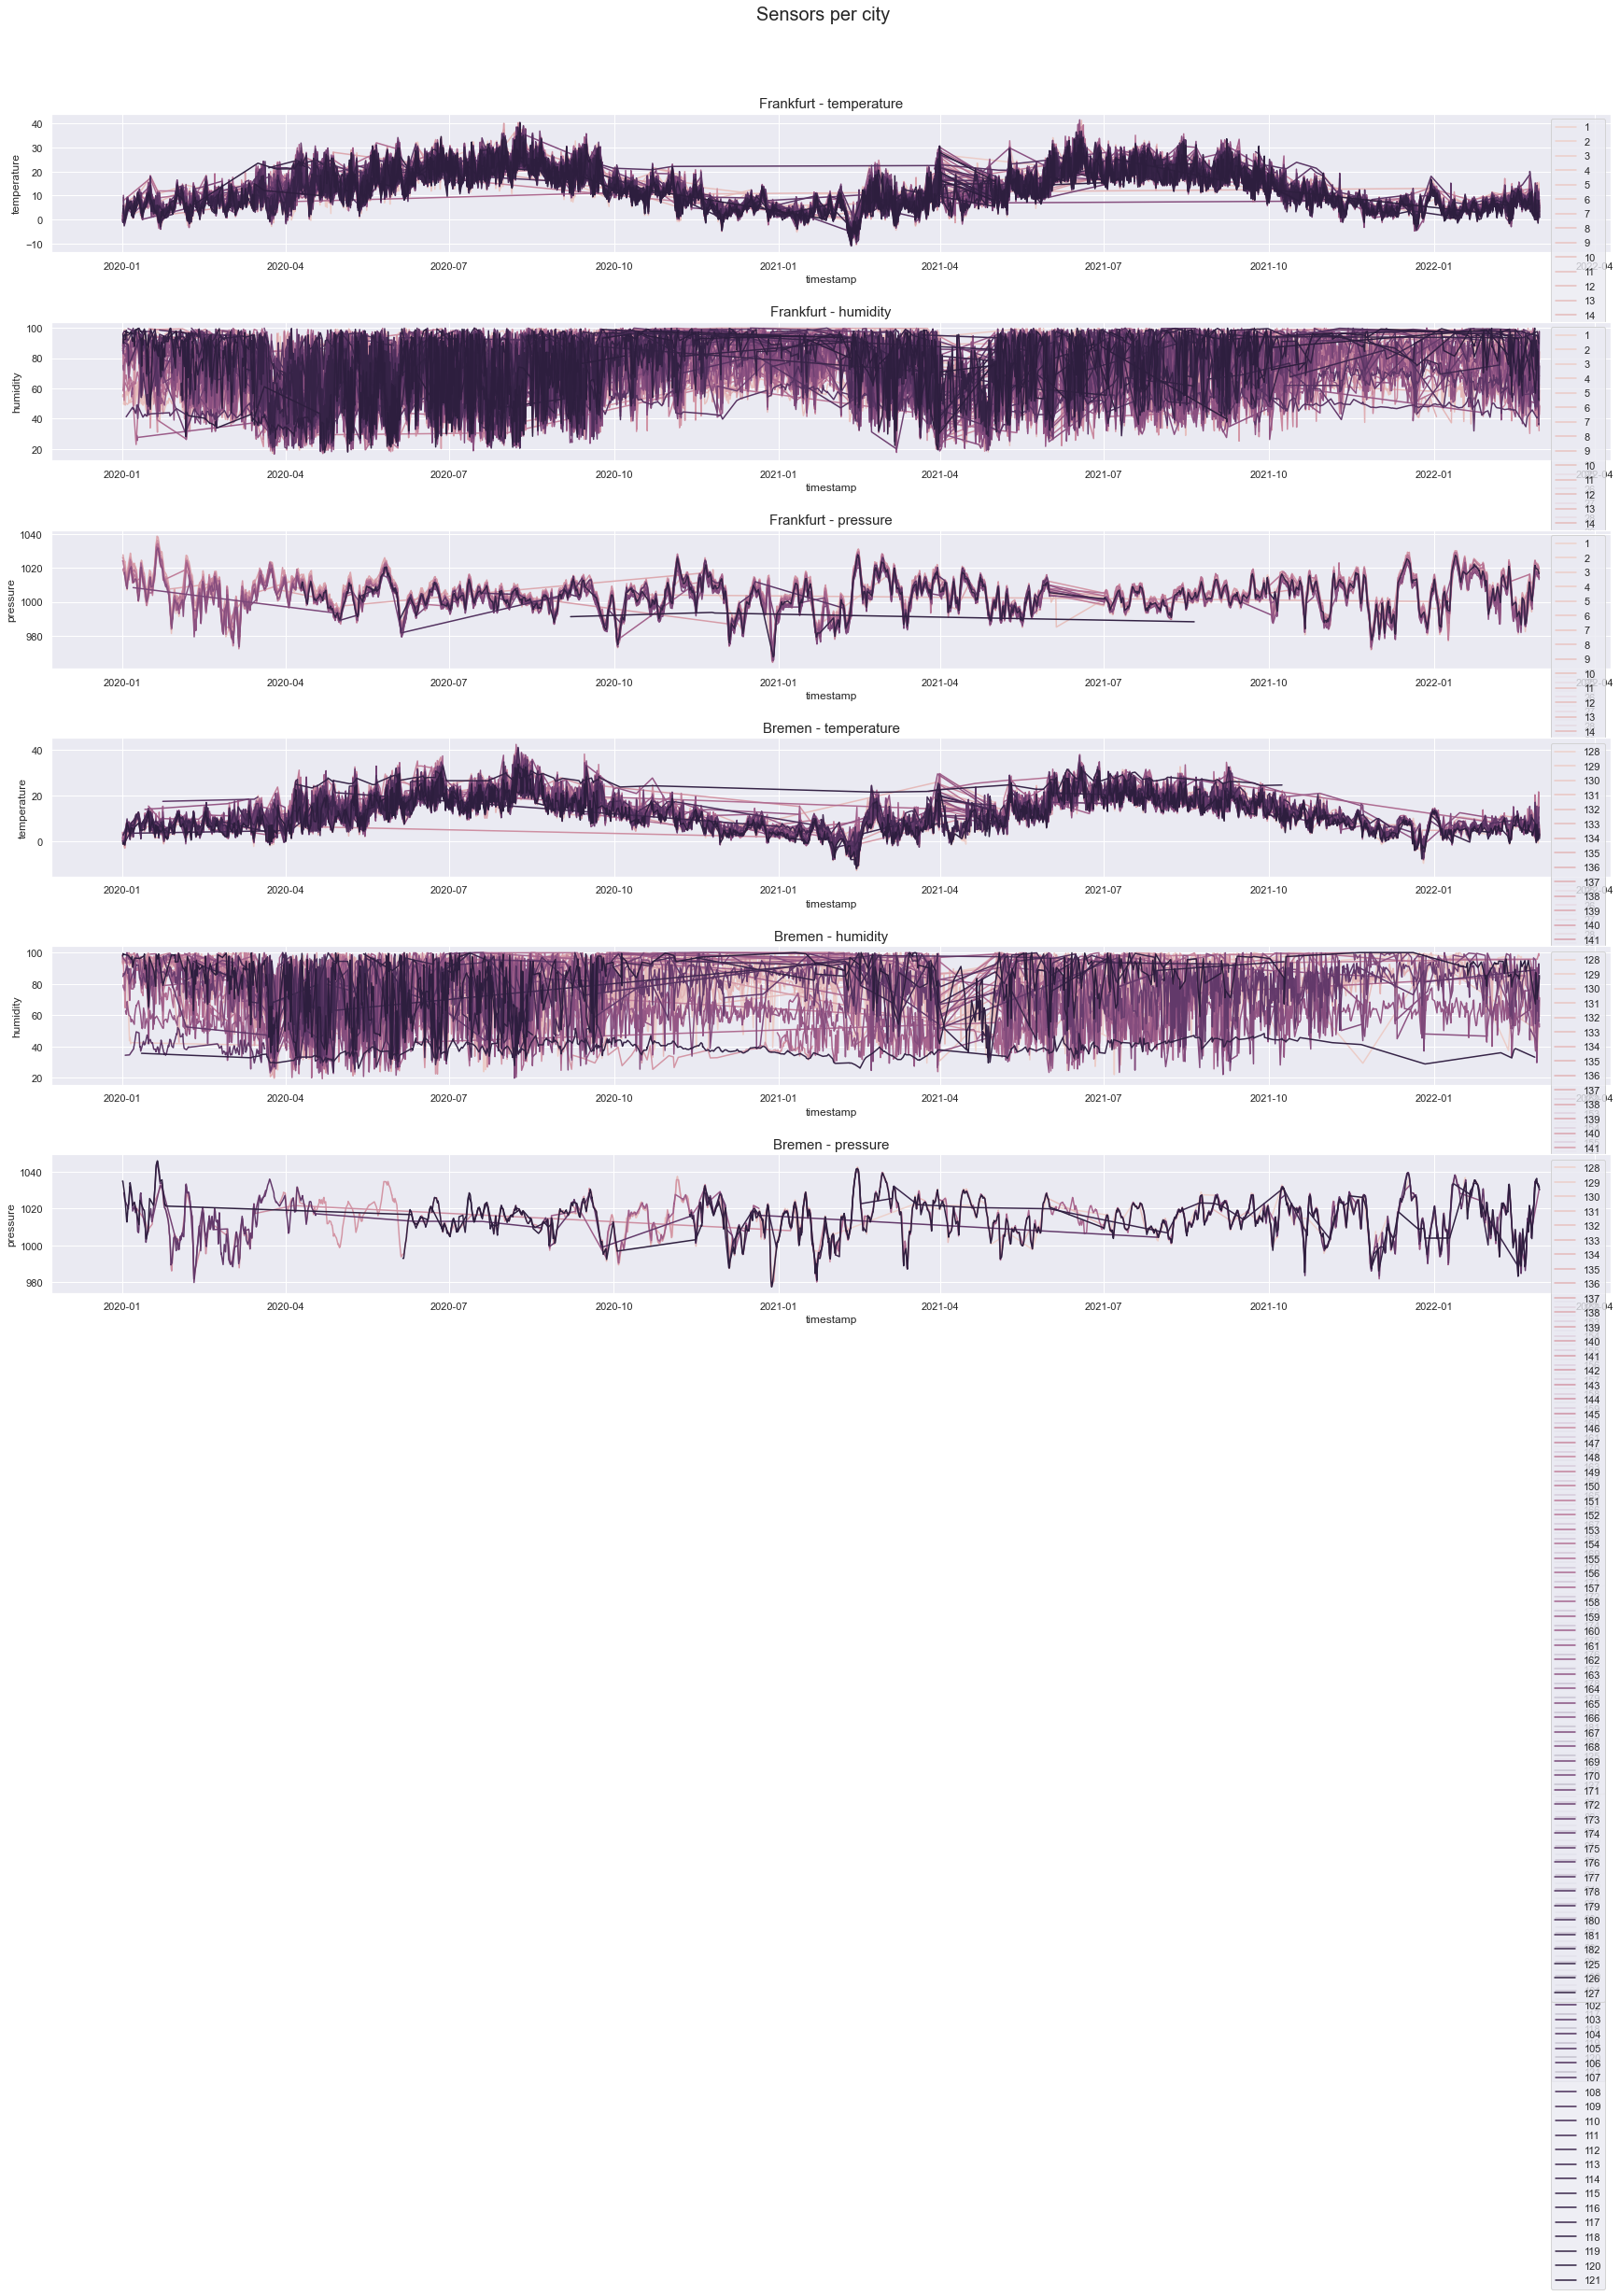

In [42]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(24, 20))
plt.suptitle("Sensors per city", fontsize=20) # title of plot
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

labels_frankfurt = set(df_sc.query("city=='Frankfurt'")['location_id'])
labels_bremen = set(df_sc.query("city=='Bremen'")['location_id'])

sns.lineplot(data=df_sc[df_sc['city']=='Frankfurt'][::10], x='timestamp', y='temperature', hue='location_id', ax=ax1, legend=False)
ax1.legend(labels=labels_frankfurt)
ax1.set_title('Frankfurt - temperature', fontsize = 15)

sns.lineplot(data=df_sc[df_sc['city']=='Frankfurt'][::10], x='timestamp', y='humidity', hue='location_id', ax=ax2, legend=False)
ax2.legend(labels=labels_frankfurt)
ax2.set_title('Frankfurt - humidity', fontsize = 15)

sns.lineplot(data=df_sc[df_sc['city']=='Frankfurt'][::10], x='timestamp', y='pressure', hue='location_id', ax=ax3, legend=False)
ax3.legend(labels=labels_frankfurt)
ax3.set_title('Frankfurt - pressure', fontsize = 15)

sns.lineplot(data=df_sc[df_sc['city']=='Bremen'][::10], x='timestamp', y='temperature', hue='location_id', ax=ax4, legend=False)
ax4.legend(labels=labels_bremen)
ax4.set_title('Bremen - temperature', fontsize = 15)

sns.lineplot(data=df_sc[df_sc['city']=='Bremen'][::10], x='timestamp', y='humidity', hue='location_id', ax=ax5, legend=False)
ax5.legend(labels=labels_bremen)
ax5.set_title('Bremen - humidity', fontsize = 15)

sns.lineplot(data=df_sc[df_sc['city']=='Bremen'][::10], x='timestamp', y='pressure', hue='location_id', ax=ax6, legend=False)
ax6.legend(labels=labels_bremen)
ax6.set_title('Bremen - pressure', fontsize = 15)


#plt.legend([], [], frameon=False)


<AxesSubplot:xlabel='timestamp', ylabel='humidity'>

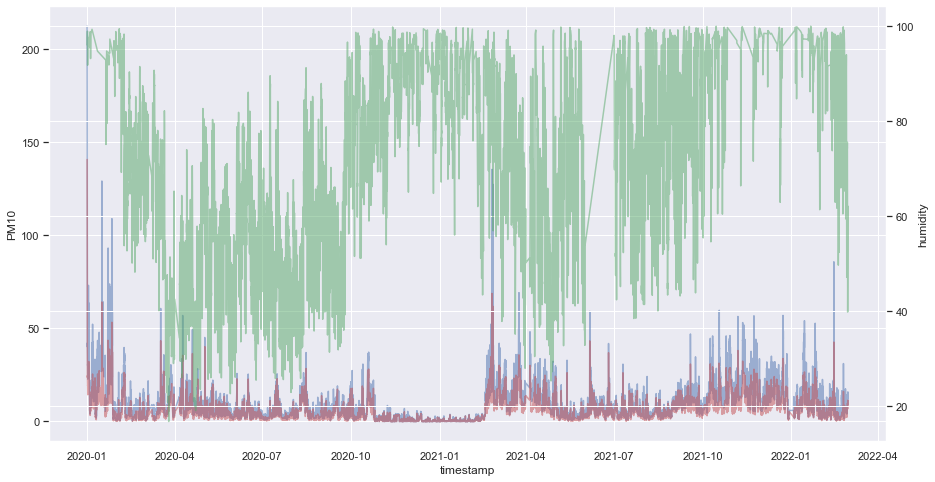

In [31]:
ids_frankfurt = df_sc.query("city=='Frankfurt'")['location_id']

plt.figure(figsize=(15, 8))
ax = sns.lineplot(data=df_sc[df_sc['location_id']==ids_frankfurt[0]], x='timestamp', y='PM10', color='b', alpha=.5)
sns.lineplot(data=df_sc[df_sc['location_id']==ids_frankfurt[0]], x='timestamp', y='PM2p5', color="r", alpha=.5, ax=ax)
ax2 = ax.twinx()
sns.lineplot(data=df_sc[df_sc['location_id']==ids_frankfurt[0]], x='timestamp', y='humidity', color="g", alpha=.5, ax=ax2)



<AxesSubplot:>

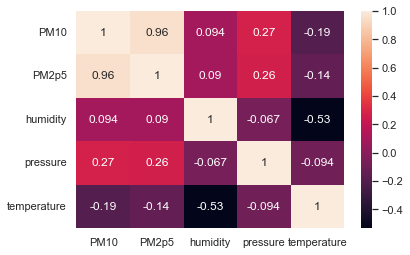

In [32]:
# print(data_cols[:].append('hour'))
# print(data_cols_wo_std)
sns.heatmap(df_sc[df_sc['location_id']==ids_frankfurt[0]][data_cols_wo_std].corr(), annot=True)

In [33]:
# dti = pd.date_range("2021-02-01", periods=24*365, freq="H")
one_year_full = pd.DataFrame()
one_year_full['timestamp'] = pd.date_range("2021-03-01", "2022-02-28 23:00:00", freq="H")

In [34]:
one_year_full_2 = pd.merge(one_year_full, df_sc[df_sc['location_id']==2], how='left', on='timestamp')
print(f"{one_year_full_2['PM10'].isna().sum()} missing values in PM10")
print(f"{one_year_full_2['PM2p5'].isna().sum()} missing values in PM2.5")

240 missing values in PM10
240 missing values in PM2.5


In [35]:
one_year_full_2.index[one_year_full_2['PM10'].isna()]#.tolist()

Int64Index([ 729,  730,  731,  732,  733,  734,  735,  736,  737,  738,
            ...
            7396, 7397, 7398, 7399, 7400, 7401, 7402, 7403, 8585, 8586],
           dtype='int64', length=240)

In [36]:
# give measured PM-values in European Air Quality Index https://www.eea.europa.eu/themes/air/air-quality-index
def pm2p5_bins(pm):
    bins = {
        '1-good': [0,10],                    # good
        '2-fair': [10,20],                   # fair
        '3-moderate': [20,25],                   # moderate
        '4-poor': [25,50],                   # poor
        '5-very poor': [50,75],                   # very poor
        '6-extremely poor': [75,800],                  # extremely poor
        '7-undefined': [800,2000]                 # undefined
    }
    for k,v in bins.items():
        if v[0] <= pm < v[1]:
            return k

def pm10_bins(pm):
    bins = {
        '1-good': [0,20],                    # good
        '2-fair': [20,40],                   # fair
        '3-moderate': [40,50],                   # moderate
        '4-poor': [50,100],                   # poor
        '5-very poor': [100,150],                   # very poor
        '6-extremely poor': [150,1200],                  # extremely poor
        '7-undefined': [1200,2000]                 # undefined
    }
    for k,v in bins.items():
        if v[0] <= pm < v[1]:
            return k
        
df_sc["PM2p5_quality"] = df_sc["PM2p5"].apply(pm2p5_bins)
df_sc["PM10_quality"] = df_sc["PM10"].apply(pm10_bins)

In [37]:
pm2p5_quality_count = pd.DataFrame(df_sc['PM2p5_quality'].value_counts()).reset_index()
pm10_quality_count = pd.DataFrame(df_sc['PM10_quality'].value_counts()).reset_index()

pm10_quality_count.columns = ['quality', 'PM10_count']
pm2p5_quality_count.columns = ['quality', 'PM2p5_count']

quality_absolute = pm2p5_quality_count.merge(pm10_quality_count, on='quality').sort_values('quality')
quality_absolute

quality  PM2p5_count  PM10_count
0            1-good      1445743     1517317
1            2-fair       278159      232187
3        3-moderate        53785       37814
2            4-poor        65925       52013
6       5-very poor         6057        9799
5  6-extremely poor        10134       10951
4       7-undefined        12602       12327

In [38]:
# calculate percentages 
percentage_PM2p5 = (pd.crosstab(index=[0],
                             columns=df_sc['PM2p5_quality'],
                             normalize="index") * 100).round(2).iloc[0,:].reset_index()
percentage_PM2p5.columns = ['quality', 'PM2p5']
#display(percentage_PM2p5)

percentage_PM10 = (pd.crosstab(index=[0],
                             columns=df_sc['PM10_quality'],
                             normalize="index") * 100).round(2).iloc[0,:].reset_index()
percentage_PM10.columns = ['quality', 'PM10']                             
#display(percentage_PM2p5)

quality_percentage = percentage_PM2p5.merge(percentage_PM10, on='quality')
quality_percentage

quality  PM2p5   PM10
0            1-good  77.21  81.04
1            2-fair  14.86  12.40
2        3-moderate   2.87   2.02
3            4-poor   3.52   2.78
4       5-very poor   0.32   0.52
5  6-extremely poor   0.54   0.58
6       7-undefined   0.67   0.66

Text(0.5, 0, 'air quality')

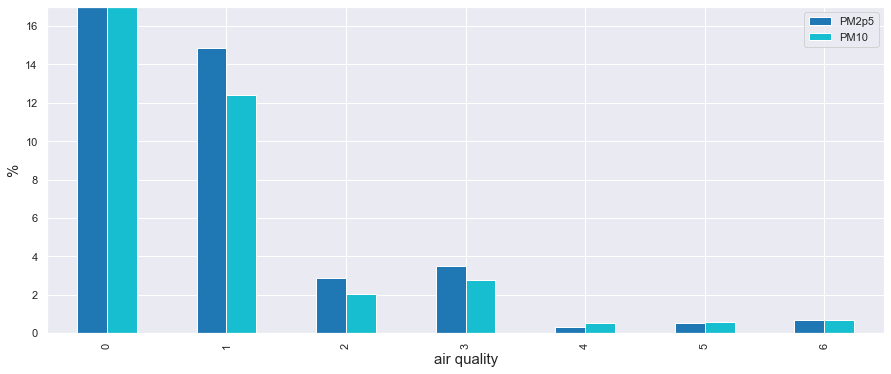

In [39]:
#sns.barplot(data=cross_tab_prop_PM10, y='PM10_count')
#sns.barplot(data=cross_tab_prop_PM2p5, y='PM2p5_count')
quality_percentage.plot(kind='bar', 
                    stacked=False, 
                    colormap='tab10', # 'tab10' 'Set1' 'Dark2'
                    figsize=(15, 6))
plt.ylim(0,17)
plt.ylabel('%', fontsize=15)
plt.xlabel('air quality', fontsize=15)
#plt.xticks(range(1,8,1));
